In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
from IPython.display import display,Markdown,Latex
from qiskit.visualization import array_to_latex

<IPython.core.display.Latex object>

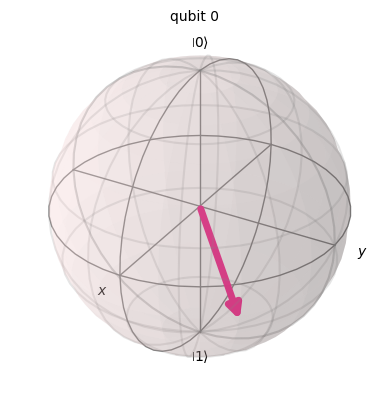

In [2]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

theta = 1.9
phi   = 0.8

psi_ket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)
array_to_latex(psi_ket,prefix= '\ket{\psi} = ')

display(Statevector(psi_ket).draw('latex'))
display(Statevector(psi_ket).draw('Bloch'))

In [3]:
p0 = np.abs(psi_ket[0])**2
p1 = np.abs(psi_ket[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))

p(0)= [0.33836] , p(1)= [0.66164]


In [4]:
nshots = 10000

[Qibo 0.1.12.dev0|INFO|2024-03-03 20:53:34]: Using tensorflow backend on /device:CPU:0


counts_psi =  Counter({'1': <tf.Tensor: shape=(), dtype=int64, numpy=6610>, '0': <tf.Tensor: shape=(), dtype=int64, numpy=3390>})


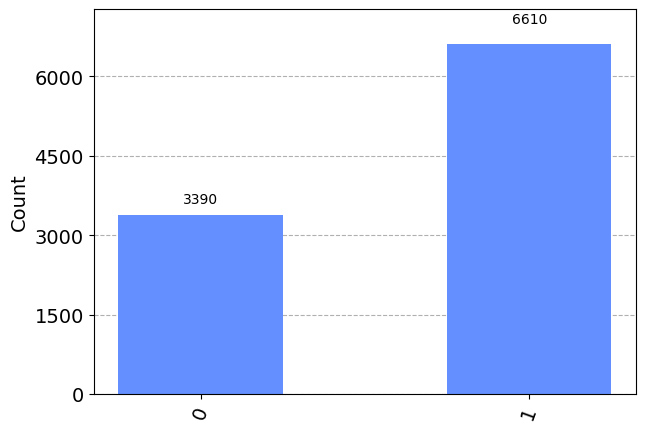

In [5]:
'''Qibo_code_cell'''

from qibo.models.circuit import Circuit, gates
nqubits = 1
qc = Circuit(nqubits)

qc.add(gates.U3(0, theta, phi, 0, trainable=True))

qc.add(gates.M(0))

#tQ.draw_qibo_circuit_mpl(c)
result = qc(nshots=nshots)
counts_psi = result.frequencies()


from qiskit.visualization import plot_histogram
print('counts_psi = ',counts_psi)
plot_histogram(counts_psi) # Mostramos un histograma de resultados

In [6]:
p0_exp = counts_psi['0']/nshots
p1_exp = counts_psi['1']/nshots

print('p(0)_exp =', p0_exp,'  p(1)_exp = ',p1_exp)

p(0)_exp = tf.Tensor(0.339, shape=(), dtype=float64)   p(1)_exp =  tf.Tensor(0.661, shape=(), dtype=float64)


In [7]:
#uncomment and paste your token
#IBMQ.save_account('')

In [8]:
from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q')
# provider.backends()

In [9]:
# from qiskit.providers.ibmq import least_busy
# IBMQ_best_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 1 
#                                       and not x.configuration().simulator 
#                                       and x.status().operational==True))
# print("least busy backend: ", IBMQ_best_backend)

In [10]:
# qobj = transpile(qc_psi, IBMQ_best_backend)           # Compila el código para el backend
# job = IBMQ_best_backend.run(qobj, shots=1024) # Hacemos la simulación 1024 veces 

In [11]:
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)

In [12]:
# counts = job.result().get_counts()
# print("Cuentas=",counts)

In [13]:
# plot_histogram(counts)

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


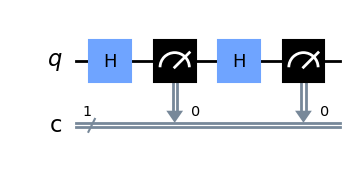

In [14]:
qc = QuantumCircuit(1,1)

qc.h(0)
qc.measure(0,0) #anula o no esta medición intermedia para ver la diferencia
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [15]:
M_simulator = Aer.get_backend('qasm_simulator')

execute(qc,M_simulator).result().get_counts()

NameError: name 'Aer' is not defined

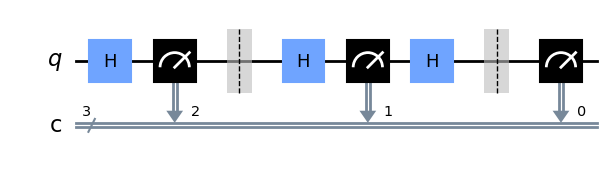

NameError: name 'execute' is not defined

In [16]:
'solucion'
qc = QuantumCircuit(1,3)

qc.h(0)

qc.measure(0,2)

qc.barrier()
qc.h(0)
qc.measure(0,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)

display(qc.draw('mpl'))

execute(qc,M_simulator,shots=1).result().get_counts()


In [17]:
def measure_XYZ(qc,axis="Z",shots=1024):
    'needs execute'
    import copy 
    qc0 = copy.deepcopy(qc)
    if axis == "Z":
        qc0.measure(0,0)
    if axis == "X":
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
    elif axis == "Y":
        qc0.sdg(0)
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
        qc0.s(0)
        
    counts=execute(qc0,backend=Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()
    
    return counts

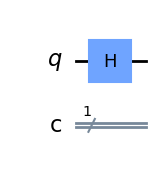

NameError: name 'execute' is not defined

In [18]:
shots = 10000

qc = QuantumCircuit(1,1)
qc.h(0)
display(qc.draw('mpl'))

cuentasz = measure_XYZ(qc,axis="Z",shots=shots)
print("cuentas(base Z)=",cuentasz)

cuentasx = measure_XYZ(qc,axis="X",shots=shots)
print("cuentas(base X)=",cuentasx)

cuentasy = measure_XYZ(qc,axis="Y",shots=shots)
print("cuentas( base Y)=",cuentasy)


<IPython.core.display.Latex object>

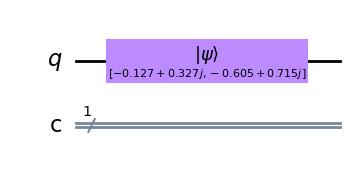

In [19]:
psi_state= tQ.random_ket(2).reshape(2)
display(Statevector(psi_state).draw('latex'))
qc_psi = QuantumCircuit(1,1)
qc_psi.initialize(psi_state,0)
qc_psi.draw('mpl')

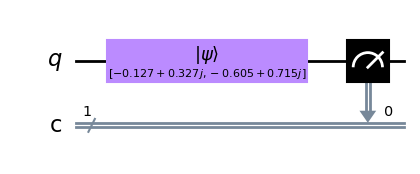

NameError: name 'execute' is not defined

In [20]:
'añadimos el medidor, trabajaremos con una copia del circuito'
import copy
qc_psi_copy = copy.deepcopy(qc_psi)
qc_psi_copy.measure(0,0)
display(qc_psi_copy.draw('mpl'))

shots = 10000
counts_psi = execute(qc_psi_copy,M_simulator,shots = shots).result().get_counts()
display(counts_psi)

In [21]:
mean_Z = 0

for bits, counts  in counts_psi.items():
    mean_Z += (-1)**(int(bits))* (counts/shots)

print('<Z> =',np.round(mean_Z,5))

<Z> = -0.322


In [22]:
#from qiskit.circuit.library.standard_gates import U3Gate
M_simulator = Aer.get_backend('qasm_simulator')

'definimos un estado arbitrario en la esfera de Bloch'
theta = 1.  #rad
phi   = 2.  #rad

' el operador unitario que lo genera a partir de |0> es u(theta, phi, 0,0)'
qc_Upsi = QuantumCircuit(1,1)
qc_Upsi.u(theta,phi,0,0)
qc_Upsi.z(0)
#qc_Upsi.x(0)
#qc_Upsi.y(0)
qc_Upsi.u(-theta,0,-phi,0)

qc_Upsi.measure(0,0)

display(qc_Upsi.draw('mpl'))

' ejecutamos '
shots= 100000
counts=execute(qc_Upsi,backend=M_simulator,shots=shots).result().get_counts()

' ahora solo nos interesa la fracción de 0s '
mean_A = np.sqrt(counts['0']/shots)
print('<A> =',np.round(mean_A,5))


NameError: name 'Aer' is not defined